In [1]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view

In [2]:
#téléchargement des fichiers
with MPRester("QhH6n7UMD6eoOToxuLav") as m:
    #structure for materials
    structure = m.get_structure_by_material_id("mp-31451")
struct = SpacegroupAnalyzer(structure)
struct_con = struct.get_conventional_standard_structure()
#récupération de la structure conventionnel qui correspond à la maille du fichier CIF symmetrized

# 1) Graphe de l'intensité des pics de diffraction par rapport à l'angle

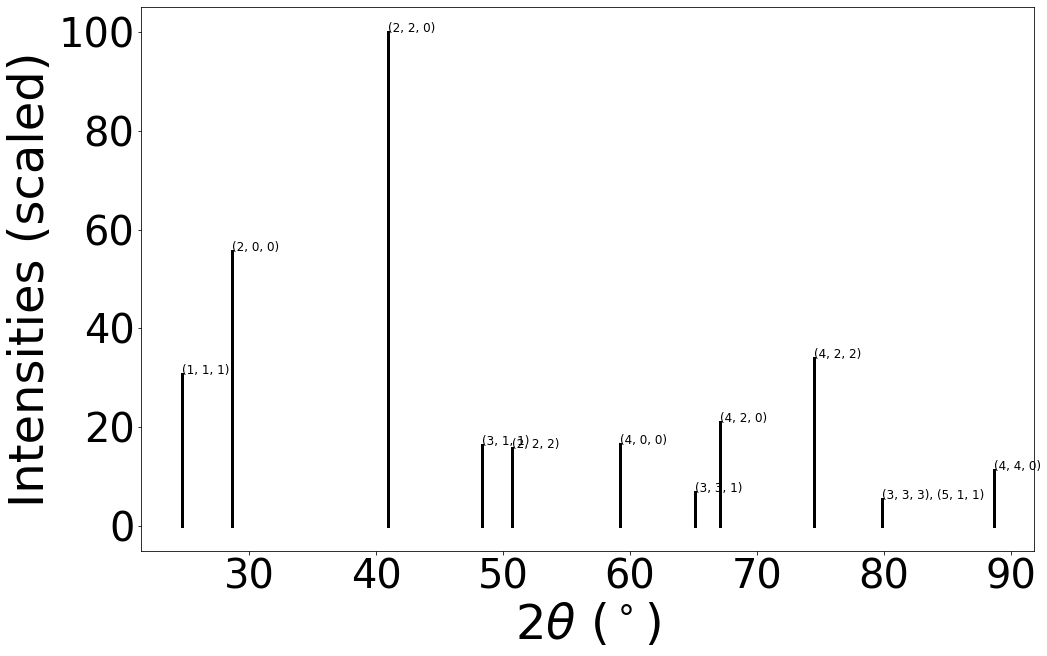

In [3]:
xrd_calculator = XRDCalculator(wavelength='CuKa1', symprec=0, debye_waller_factors=None) #utilisation du calculateur  de diffraction
# création d'un graphe des résultats
ploting = xrd_calculator.get_plot(struct_con, two_theta_range=(0, 90), annotate_peaks='compact', ax=None, with_labels=True, fontsize=12)
ploting.show()

# 2) Récupération des résultats pour les 3 premiers pics

In [4]:
#récupération des résultats 
xrd_pattern = xrd_calculator.get_pattern(struct_con, scaled=True, two_theta_range=(0, 90))
scale = (xrd_pattern.x)[0:3] #angle
intensity = (xrd_pattern.intensity)[0:3] #intensité
hkls = xrd_pattern.hkls[0:3] #plan hkl

for i in range(len(scale)): #print des résultats
    print("Le pic de diffraction "+str(i + 1)+" est associé à : \n")
    print("   1) un angle 2\u03B8 = "+str(scale[i])+"°\n")
    print("   2) une intensité = "+str(intensity[i])+" sur une échelle de 100\n")
    print("   3) à un plan (hkl) = "+str(hkls[i][0].get("hkl"))+" de multiplicité "+str(hkls[i][0].get("multiplicity"))+"\n")
    print("\n")


Le pic de diffraction 1 est associé à : 

   1) un angle 2θ = 24.70384528481966°

   2) une intensité = 30.78609860339161 sur une échelle de 100

   3) à un plan (hkl) = (1, 1, 1) de multiplicité 8



Le pic de diffraction 2 est associé à : 

   1) un angle 2θ = 28.601133123940045°

   2) une intensité = 55.5763980658091 sur une échelle de 100

   3) à un plan (hkl) = (2, 0, 0) de multiplicité 6



Le pic de diffraction 3 est associé à : 

   1) un angle 2θ = 40.89181307481965°

   2) une intensité = 100.0 sur une échelle de 100

   3) à un plan (hkl) = (2, 2, 0) de multiplicité 12



